# Moving Average Smoothing for Data Preparation and Time Series Forecasting in Python

Moving average smoothing is a naive and effective technique in time series forecasting. It can be used for data preparation, feature engineering, and even directly for making predictions.

After completing this tutorial, you will know:
- How moving average smoothing works and some expectations of your data before you can use it.
- How to use moving average smoothing for data preparation and feature engineering.
- How to use moving average smoothing to make predictions.

# Moving Average Smoothing

Smoothing is a technique applied to time series to remove the fine-grained variation between time steps.

The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting.

Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series. A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value.

> NOTE: The _moving_ part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calculate the average values in the new series.

There are two main types of moving average the are used:
- centered
- trailing

## Centered Moving Average

The value at $time \ (t)$ is calculated as the average of raw observations at, before, and after $time \ (t)$. \
`center_ma(t) = mean(obs(t-1), obs(t), obs(t+1))`

This method requires knowledge of future values, and as such, it is used on time series analysis to better understand the dataset. A center moving average can be used as a general method to remove trend and seasonal components from a time series, a method that we often cannot use when forecasting.

## Trailing Moving Average

The value at $time \ (t)$ is calculated as the average of the raw observations at and before the $time \ (t)$. \
`trail_ma(t) = mean(obs(t-2), obs(t-1), obs(t))`

Trailing moving average only uses historical observations and as such, it is used on time series forecasting.

## Data Expectations

Calculating a moving average of a time series makes some assumptions about your data. It is assumed the both trend and seasonal components have been removed from your time series. This means that your time series is **stationary**, or does not show obvious trends (long-tern increasing or decreasing movement) or seasonality (consistent periodic structure).

The are many methods to remove trends and seasonality from a time series dataset when forecasting. Two good methods for each are to use the differencing method, and to model the behavior and explicitly subtract it from the series. Moving average values can be used in a number of ways when using machine learning algorithms on time series problems.

## Daily Female Births Dataset

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


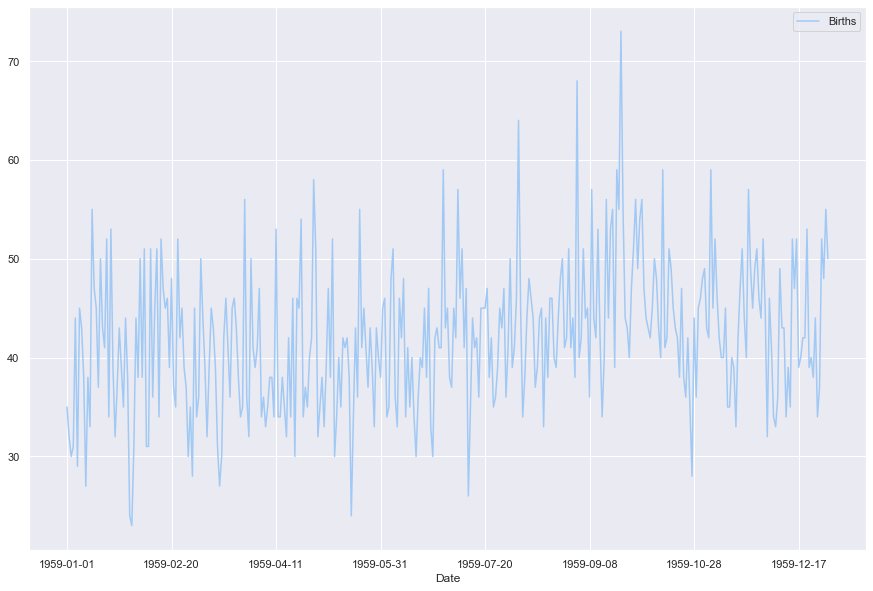

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style='darkgrid', palette='pastel')

data = pd.read_csv('./res/data/daily_total_female_births.csv', header=0, index_col=0)
print(data.head())
data.plot(figsize=(15,10))
plt.show()

## Moving Average as Data Preparation

Moving average can be used as a data preparation technique to create a smoothed version of the original dataset. The `rolling()` function on the Series Pandas object will automatically group observations into a window. You can specify the window size, and by defailt a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset.

New observations in the future can be just as easily transformed by keeping the raw values for the last few observations and updating a new average value.

               Births
Date                 
1959-01-01        NaN
1959-01-02        NaN
1959-01-03  32.333333
1959-01-04  31.000000
1959-01-05  35.000000
1959-01-06  34.666667
1959-01-07  39.333333
1959-01-08  39.000000
1959-01-09  42.000000
1959-01-10  36.000000


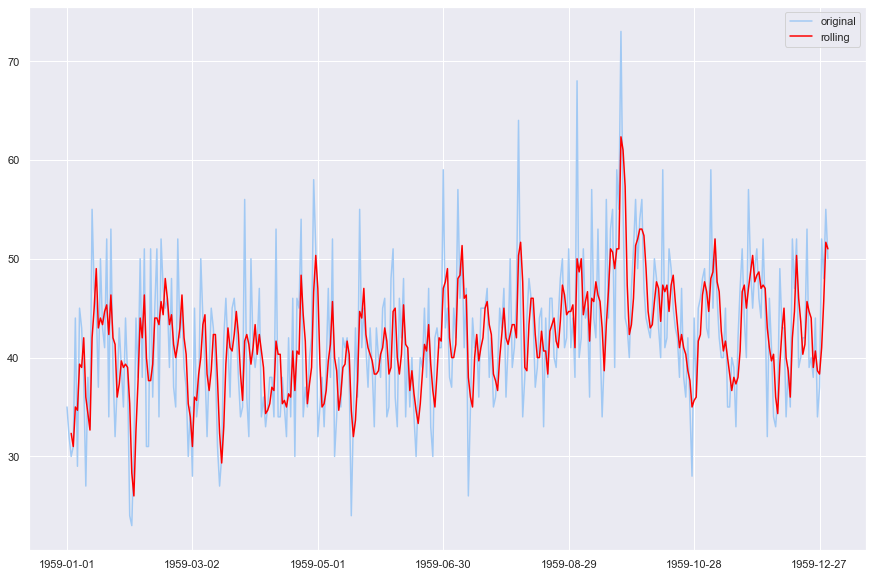

In [60]:
# tail-rolling average transform
rolling = data.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xticks(np.arange(0, len(rolling_mean), 60))
ax.plot(data, label='original')
ax.plot(rolling_mean, color='red', label='rolling')
plt.legend()
plt.show()

## Moving Average as Feature Engineering

The moving average can be used as a source of new information when modeling a time series forecast as a supervised learning problem. In this case, the moving average is calculated and added as a new input feature used to predict the next time step.

In [63]:
data_copy = pd.DataFrame(data.values)

width = 3
lag1 = data_copy.shift(1)
lag3 = data_copy.shift(width - 1)

window = lag3.rolling(window=width)
means = window.mean()

data_concat = pd.concat([means, lag1, data_copy], axis=1)
data_concat.columns = ['mean', 't-1', 't+1']
print(data_concat.head(10))

        mean   t-1  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


## Moving Average as Prediction

The moving average value can also be used directly to make predictions. It is a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for. The moving average model for predictions can easily be used in a walk-forward manner. As new observations are made available, the model can be updated and a prediction can be made for the next day.

Test MSE = 61.37906691221608


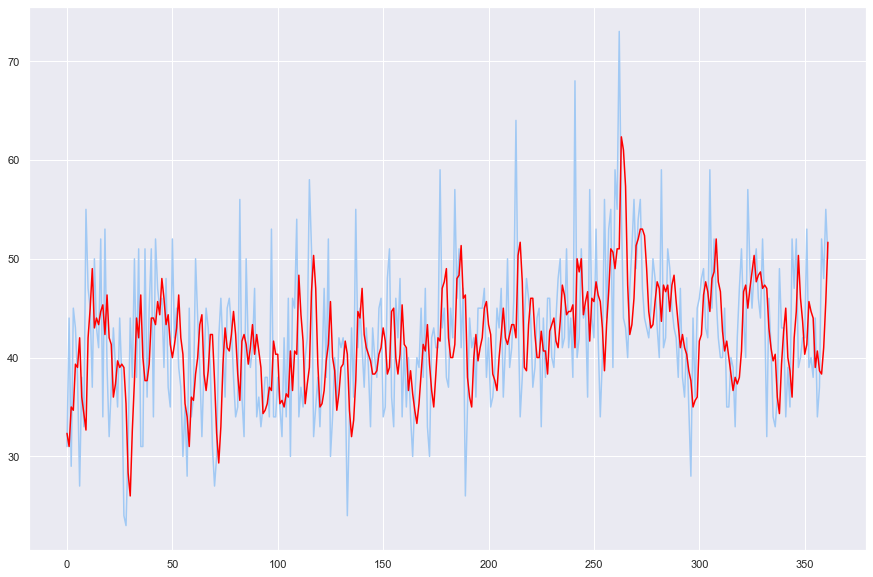

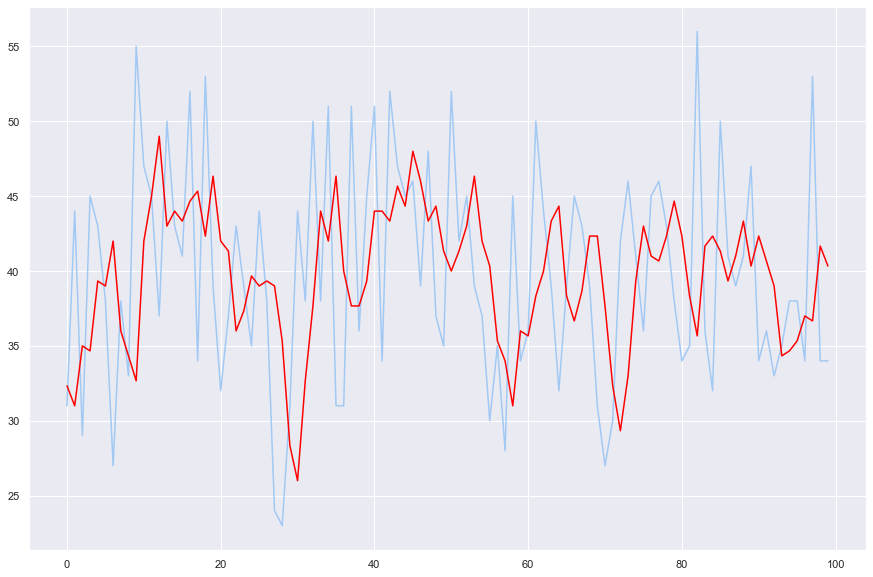

In [68]:
from sklearn.metrics import mean_squared_error

x = data.values

# prepare situation
window = 3
history = [x[i] for i in range(window)]
test = [x[i] for i in range(window, len(x))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    # print(f'predicted = {yhat}, expected = {obs}')

error = mean_squared_error(test, predictions)
print(f'Test MSE = {error}')

# plot
plt.figure(figsize=(15,10))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.figure(figsize=(15,10))
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()